Problem 2: Scaling Behavior of Self-Avoiding Polymers
Consider a self-avoiding polymer chain of N monomers on a square lattice in two dimensions.The average end-to-end distance $<R_e^2>^{1/2}$ depends on the monomer number N as

$<R_e^2>^{1/2}$ ~ $N^\nu$

for ufficiently large N.

(a) Calculate the exponent $\nu $ by a Monte Carlo simulation with the growth algorithm, both with the simple and the Rosenbluth method, for chain lengths N ≤ 50. Average over at least 100 conformations to calculate $<R_e^2>^{1/2}$.

1.Growth algorithm

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def initialize_chain():
    chain = np.zeros((1,2))
    return chain

def add_monomer(chain,last_direction):
    directions = [1, 2, 3, 4]
    if last_direction == 0:
        direction = np.random.choice(directions)
    else:
        while (True):
            direction = np.random.choice(directions)
            if abs(direction-last_direction) != 2:
                break
    if direction == 1:
        new_monomer = [chain[-1][0], chain[-1][1]+1]  #"up"
    elif direction == 2:
        new_monomer = [chain[-1][0]+1, chain[-1][1]]  #"right"
    elif direction == 3:
        new_monomer = [chain[-1][0], chain[-1][1]-1]  #"down"
    else:
        new_monomer = [chain[-1][0]-1, chain[-1][1]]  #"left"
        
    if new_monomer in chain.tolist():
        return False,False
    else:
        chain = np.vstack((chain, new_monomer))
        return chain,direction
    
def simulate_growth(N):
    chain = initialize_chain()
    successful_attempts = 0
    false_attempts = 0
    last_direction=0
    while len(chain) < N:
        chain,last_direction = add_monomer(chain,last_direction)
        if last_direction == False:
            return False

    return chain

def end2end(N):
    success = 0
    R_list=[]
    while success<100:
        result = simulate_growth(N)
        if type(result) != bool:
            success+=1
            x,y=result[-1]
            r = np.sqrt(x**2+y**2)
            R_list.append(r)
    return R_list


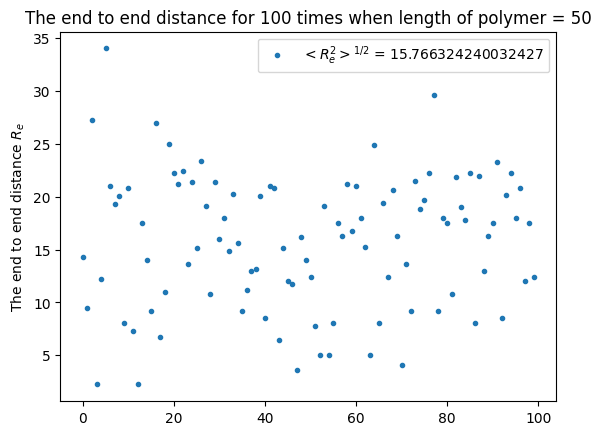

In [27]:
N=50

R_list = end2end(N)
average_end2enddist=np.average(R_list)
plt.plot(R_list,'.',label='$<R_e^2>^{1/2}$ = '+str(average_end2enddist))
plt.title("The end to end distance for 100 times when length of polymer = "+str(N))
plt.ylabel("The end to end distance $R_e$")
plt.legend()

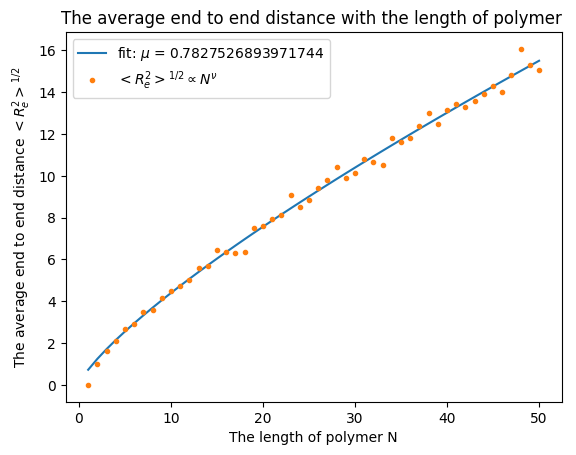

In [31]:
from scipy.optimize import curve_fit
N=50
def func(x,c,nu):
    return c*x**nu

i_list = list(range(1, N+1))
end2end_list=[]
for i in range(N):
    R_list = end2end(i+1)
    average_end2enddist=np.average(R_list)
    end2end_list.append(average_end2enddist)

popt,pcov = curve_fit(func,i_list,end2end_list)


plt.plot(i_list, func(i_list, *popt), '-', label='fit: $\mu$ = ' +str(popt[1]))
plt.plot(i_list,end2end_list,'.',label=r'$<R_e^2>^{1/2} \propto N^{\nu}$')
plt.title("The average end to end distance with the length of polymer ")
plt.ylabel("The average end to end distance $<R_e^2>^{1/2}$")
plt.xlabel("The length of polymer N")
plt.legend()

2.Simple method

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def initialize_chain():
    chain = np.zeros((1,2))
    return chain

def add_monomer(chain):
    directions = [1, 2, 3, 4]
    direction = np.random.choice(directions)
    if direction == 1:
        new_monomer = [chain[-1][0], chain[-1][1]+1]  #"up"
    elif direction == 2:
        new_monomer = [chain[-1][0]+1, chain[-1][1]]  #"right"
    elif direction == 3:
        new_monomer = [chain[-1][0], chain[-1][1]-1]  #"down"
    else:
        new_monomer = [chain[-1][0]-1, chain[-1][1]]  #"left"
        
    chain = np.vstack((chain, new_monomer))
    return chain
    
def simulate_growth(N):
    chain = initialize_chain()
    while len(chain) < N:
        chain = add_monomer(chain)
    return chain

def betaenergy(chain,betaj0):
    unique_arr, counts = np.unique(chain, axis=0, return_counts=True)
    count = 0
    for i in range(len(unique_arr)):
        if counts[i] >= 2:
            count += counts[i] * (counts[i] - 1) // 2
    return betaj0*count

def end2end(N,M,betaj0): #N the length of polymer, M times of try,100
    sum_up = 0
    sum_down = 0
    for i in range(M):
        chain = simulate_growth(N)
        x,y = chain[-1]
        r2 = x**2+y**2
        Ener =betaenergy(chain,betaj0)
        sum_up+=r2*np.exp(-Ener)
        sum_down+=np.exp(-Ener)
    average_end2end2 = sum_up/sum_down
    return average_end2end2

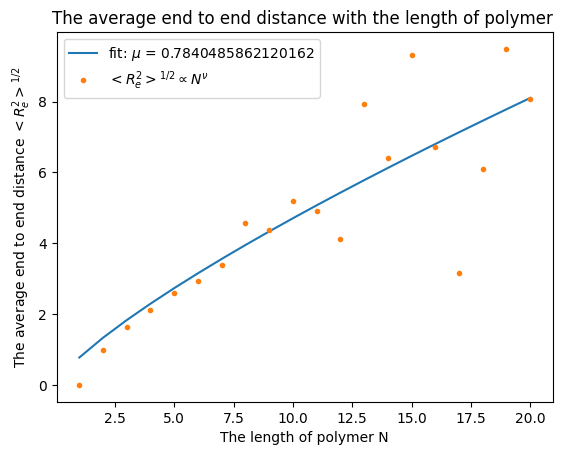

In [124]:
from scipy.optimize import curve_fit
N=20
M=100
betaj0 = 100
def func(x,c,nu):
    return c*x**nu

i_list = list(range(1, N+1))
end2end_list=[]
for i in range(N):
    R2= end2end(i+1,M,betaj0)
    end2end_list.append(np.sqrt(R2))

popt,pcov = curve_fit(func,i_list,end2end_list)


plt.plot(i_list, func(i_list, *popt), '-', label='fit: $\mu$ = ' +str(popt[1]))
plt.plot(i_list,end2end_list,'.',label=r'$<R_e^2>^{1/2} \propto N^{\nu}$')
plt.title("The average end to end distance with the length of polymer ")
plt.ylabel("The average end to end distance $<R_e^2>^{1/2}$")
plt.xlabel("The length of polymer N")
plt.legend()

3.Rosenbluth method

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def initialize_chain():
    chain = np.zeros((1,2))
    return chain

def add_monomer(chain,last_direction):
    directions = [1, 2, 3, 4]
    if last_direction == 0:
        direction = np.random.choice(directions)
    else:
        while (True):
            direction = np.random.choice(directions)
            if abs(direction-last_direction) != 2:
                break
    if direction == 1:
        new_monomer = [chain[-1][0], chain[-1][1]+1]  #"up"
    elif direction == 2:
        new_monomer = [chain[-1][0]+1, chain[-1][1]]  #"right"
    elif direction == 3:
        new_monomer = [chain[-1][0], chain[-1][1]-1]  #"down"
    else:
        new_monomer = [chain[-1][0]-1, chain[-1][1]]  #"left"
        
    if new_monomer in chain.tolist():
        return False,False
    else:
        chain = np.vstack((chain, new_monomer))
        return chain,direction
    
def simulate_growth(N):
    chain = initialize_chain()
    successful_attempts = 0
    false_attempts = 0
    last_direction=0
    while len(chain) < N:
        chain,last_direction = add_monomer(chain,last_direction)
        if last_direction == False:
            return False

    return chain

def end2end(N):
    success = 0
    R_list=[]
    while success<100:
        result = simulate_growth(N)
        if type(result) != bool:
            success+=1
            x,y=result[-1]
            r = np.sqrt(x**2+y**2)
            R_list.append(r)
    return R_list


KeyboardInterrupt: 

(b) Determine the number of terminations of both algorithms as a function of N.

[[0 0]
 [0 0]
 [0 0]]
3
